In [1]:
import pandas as pd # Modul for dataframe
import numpy as np # for scientific computing (math high level)
import matplotlib.pyplot as plt # Modul Visualization
import seaborn as sns # Modul Visualization

In [2]:
# Make data so that mix if want split data train or test
def Importdata(file):
    """
    Function for import data and drop duplicate
    param : Function (file<input file name>) just format (csv)
    return data
    """
    
    data = pd.read_csv(file, sep=';', skiprows=0)
    print("Data real            : ", data.shape, "- (#observation, #column)")

    data = data.drop_duplicates()
    print("after drop data : ", data.shape, "- (#observation, #column)")
    
    return data

In [3]:
#input
file_data = "bank-full.csv"

#call function
data_analisa = Importdata(file = file_data)

Data real            :  (45211, 17) - (#observation, #column)
after drop data :  (45211, 17) - (#observation, #column)


In [4]:
# Sanichek data
data_analisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [5]:
# drop columns not used
data_analisa = data_analisa.drop(columns=['age','day','campaign','pdays','previous','balance'])

# Data Splitting

In [6]:
# make function separate input, output
def SeparateOutputInput(data,
                       output_column_name):
    """
    The Function for separate data input and output
    input data for target/output and the drop or separate
    make new variable for input and output data
    """
    
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [7]:
# call function
X, y = SeparateOutputInput(data = data_analisa,
                          output_column_name = "y")

In [8]:
X.head(2) # for data input
y.head(2) # for data output

0    no
1    no
Name: y, dtype: object

# Training and Split Data

In [9]:
# Train test split
from sklearn.model_selection import train_test_split #splitting data test and train

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # because inbalance data
                                                    test_size = 0.2, # split 20% data
                                                    random_state = 123)
# print shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

In [10]:
y_train.value_counts(normalize = True)

# Baseline accurate is 88%

no     0.883018
yes    0.116982
Name: y, dtype: float64

In [11]:
# Ratio
X_test.shape[0] / X.shape[0]

# Hasil 0.20 - same with test_size

0.20001769480878548

In [12]:
# sanicheck
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 15136 to 40175
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        36168 non-null  object
 1   marital    36168 non-null  object
 2   education  36168 non-null  object
 3   default    36168 non-null  object
 4   housing    36168 non-null  object
 5   loan       36168 non-null  object
 6   contact    36168 non-null  object
 7   month      36168 non-null  object
 8   duration   36168 non-null  int64 
 9   poutcome   36168 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


# Data Preprocessing

In [13]:
# Split data numeric
numeric_column = ['duration'] # column used
numeric_column

['duration']

In [14]:
# split data train category
categorical_col = list(set(X_train.columns) - set(numeric_column))

In [15]:
# split data test category
categorical_col_test = list(set(X_test.columns) - set(numeric_column))

In [16]:
def splitNumCat(data, num_col, cat_col):
    """"
    Function for split category between numeric
    data_num = input data split numeric
    data_cat = input data split category
    """
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat

In [17]:
# call function X_train
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numeric_column,
                                       cat_col = categorical_col)

In [18]:
# call function X_test
X_test_num, X_test_cat = splitNumCat(data = X_test,
                                       num_col = numeric_column,
                                       cat_col = categorical_col_test)

# Handling missing values numeric

In [19]:
# make function imputer numeric take care if have missing nulls
from sklearn.impute import SimpleImputer

def imputerNum(data, imputer = None):
    """
    This ImputerNum for check missing valus
    and if there are missing values make median
    """
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median") # make median becauses data is skew
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [20]:
# data test
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

# data test
X_test_num_imputed, imputer_num_test = imputerNum(data = X_test_num)

# Handling missing values Category

In [21]:
# make function imputer category take care if have missing nulls
def imputerCat(data, imputer = None):
    """
    This ImputerCat for check missing valus
    and if there are missing values make UNKNOWN
    """
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant", # Identification data
                                fill_value = "UNKNOWN") # change values
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [22]:
# data train
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

# data test
X_test_cat_imputed, imputer_cat_test = imputerCat(data = X_test_cat)

# OHE

In [23]:
# OHE from X_train
categorical_ohe = pd.get_dummies(X_train_cat_imputed)

# OHE from X_test
categorical_ohe_test = pd.get_dummies(X_test_cat_imputed)

# Concat data

In [24]:
# concat data X_train
X_train_concat = pd.concat([X_train_num_imputed, categorical_ohe],
                           axis = 1)

In [25]:
# concat data X_test
X_test_concat = pd.concat([X_test_num_imputed, categorical_ohe_test],
                           axis = 1)

In [26]:
# sanichek
y_train.value_counts()

no     31937
yes     4231
Name: y, dtype: int64

In [27]:
# Encoder for model
# OHE from X_train
X_train = pd.get_dummies(X_train)

# OHE from x_test
X_test = pd.get_dummies(X_test)

In [28]:
from sklearn.preprocessing import LabelEncoder #modul for encoder categoric values

le = LabelEncoder() # convert to encoder

# fit and transform y_train
y_train = le.fit_transform(y_train)

# # fit and transform y_test
y_test = le.fit_transform(y_test)

# feature engineering

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler # modul for standart

In [30]:
def standardizeData(data, scaler = None):
    """
    This function used for convert data to
    standaritation or normal distribution 
    """
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler

In [31]:
# Make standaritation X_train
X_train_clean, scaler = standardizeData(data = X_train_concat)

# Make standaritation X_test
X_test_clean, scaler = standardizeData(data = X_test_concat)

In [32]:
# sanicheck
y_train.shape, y_test.shape

((36168,), (9043,))

# Check Performance Data

We want to know about performa data if we used a few model

# Deep learning (Neurol Network)

In [33]:
# find performa
from sklearn.metrics import confusion_matrix # for check all metrics (TN,TP, FT, FN)
from sklearn.metrics import accuracy_score # for check accuracy scores
from sklearn.metrics import classification_report # for check all metrics
from sklearn.metrics import roc_curve # check curve roc 
from sklearn.metrics import auc # check auc value 

In [34]:
# Import library for neurol network
from tensorflow.keras.models import Sequential # for model neural network 
from tensorflow.keras.layers import Dense, Flatten # Dense, flaten for model (hyperparameter)
from tensorflow.keras.optimizers import Adam # optimization (hyperparameter)
from tensorflow.keras.layers import Dropout # dropout layer (hyperparameter)
from tensorflow import keras # for model (hyperparameter)
from tensorflow.keras.callbacks import EarlyStopping # for stopping when process model overfitting
from keras.layers import Activation, Dense # for activation Dense

In [35]:
def preActivation(X, w):
    """
    Fungsi untuk mendapatkan nilai pre activation (weighted-sum)
    :param X: <pandas DataFrame> data input
    :param w: <numpy array> weight dari masing-masing input
    :return a: <numpy array> weighted sum atau pre activation
    """
    a = np.dot(X, w[1:]) + w[0]

    return a

In [36]:
def activationFunction(a, types):
    """
    Fungsi untuk melakukan aktifasi nilai pre activation
    :param a: <numpy array> pre activation value
    :param types: <str> pilihan fungsi aktivasi
    :return y: <numpy array> output perceptron
    """
    if types == "linear":
        y = a
    elif types == "sigmoid":
        y = 1 / (1 + np.exp(-a))
    elif types == "relu":
        y = np.max(0, a)
    else:
        raise Exception("Activation Function tidak terdaftar")

    return y

# Increase Model

In [37]:
#increase Metrics

from tensorflow.keras import models, layers, utils, backend as K # for calcultae increase metrics

# define metrics
def Recall(y_true, y_pred):
    """
    in the model will add calculate for increase
    Recall metrics 
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    """
    in the model will add calculate for increase
    Precision metrics 
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    """
    in the model will add calculate for increase
    F1 metrics 
    """
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [38]:
# Buat arsitektur model dengan 1 perceptron
model = keras.Sequential() # input kind model
model.add(layers.Dense(128, activation = "softmax", input_shape=(X_train_clean.shape[1],))) # for input data 
Dropout(0.5) # drop dense if not used
model.add(layers.Dense(1, activation="sigmoid")) # output dense for data
model.add(Flatten()) # converts the multi-dimensional tensor to a one-dimensional form in the output.

# overview parameter
model.summary() 

# Buat optimizer, menggunakan ADAM (varian gradient descent)
opt = Adam(learning_rate = 0.001)

# Compile model
model.compile(loss = "binary_crossentropy", # input kind loss for model
              optimizer = opt, 
              metrics = ["accuracy", Recall], # show metrics and increase recall 
             )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5888      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train model - Teruskan 100 iterasi lagi
model_hist = model.fit(X_train_clean, y_train, # input data
                       epochs = 500, # process epoch 
                       validation_split=0.2, # split data when model running
                       batch_size = 64, # make category as big as 64 batch
                       callbacks=[keras.callbacks.EarlyStopping(patience=50)], # for stopping if model overfitting
                       verbose = 2) # display process model

Epoch 1/500
453/453 - 2s - loss: 0.5302 - accuracy: 0.8787 - Recall: 0.0086 - val_loss: 0.4097 - val_accuracy: 0.8819 - val_Recall: 0.0000e+00 - 2s/epoch - 5ms/step
Epoch 2/500
453/453 - 1s - loss: 0.3548 - accuracy: 0.8851 - Recall: 0.0194 - val_loss: 0.3170 - val_accuracy: 0.8915 - val_Recall: 0.1332 - 811ms/epoch - 2ms/step
Epoch 3/500
453/453 - 1s - loss: 0.2940 - accuracy: 0.8952 - Recall: 0.2218 - val_loss: 0.2782 - val_accuracy: 0.8969 - val_Recall: 0.2809 - 824ms/epoch - 2ms/step
Epoch 4/500
453/453 - 1s - loss: 0.2640 - accuracy: 0.8991 - Recall: 0.3136 - val_loss: 0.2552 - val_accuracy: 0.9001 - val_Recall: 0.3203 - 783ms/epoch - 2ms/step
Epoch 5/500
453/453 - 1s - loss: 0.2452 - accuracy: 0.9007 - Recall: 0.3345 - val_loss: 0.2414 - val_accuracy: 0.9007 - val_Recall: 0.3569 - 769ms/epoch - 2ms/step
Epoch 6/500
453/453 - 1s - loss: 0.2342 - accuracy: 0.9022 - Recall: 0.3727 - val_loss: 0.2331 - val_accuracy: 0.9035 - val_Recall: 0.4154 - 804ms/epoch - 2ms/step
Epoch 7/500
453

Epoch 51/500
453/453 - 1s - loss: 0.1796 - accuracy: 0.9197 - Recall: 0.5655 - val_loss: 0.2221 - val_accuracy: 0.9056 - val_Recall: 0.5215 - 1s/epoch - 3ms/step
Epoch 52/500
453/453 - 1s - loss: 0.1792 - accuracy: 0.9204 - Recall: 0.5631 - val_loss: 0.2220 - val_accuracy: 0.9063 - val_Recall: 0.5229 - 1s/epoch - 3ms/step
Epoch 53/500
453/453 - 1s - loss: 0.1788 - accuracy: 0.9207 - Recall: 0.5751 - val_loss: 0.2224 - val_accuracy: 0.9056 - val_Recall: 0.5031 - 1s/epoch - 3ms/step
Epoch 54/500
453/453 - 1s - loss: 0.1783 - accuracy: 0.9208 - Recall: 0.5635 - val_loss: 0.2230 - val_accuracy: 0.9063 - val_Recall: 0.5172 - 920ms/epoch - 2ms/step
Epoch 55/500
453/453 - 1s - loss: 0.1779 - accuracy: 0.9209 - Recall: 0.5651 - val_loss: 0.2233 - val_accuracy: 0.9057 - val_Recall: 0.5361 - 870ms/epoch - 2ms/step
Epoch 56/500
453/453 - 1s - loss: 0.1775 - accuracy: 0.9214 - Recall: 0.5819 - val_loss: 0.2239 - val_accuracy: 0.9060 - val_Recall: 0.5208 - 879ms/epoch - 2ms/step
Epoch 57/500
453/45

### Visualization epoch

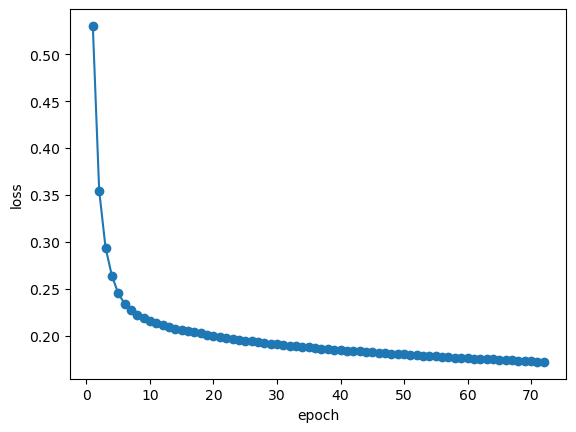

In [41]:
# Plot Error
plt.plot(1 + np.arange(72), model_hist.history["loss"], marker="o")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [42]:
# Prediksi
y_pred_proba_train = model.predict(X_train_clean)
y_pred_proba_train

1131/1131 [==============================] - 1s 1ms/step


array([[0.00782282],
       [0.04382949],
       [0.00326711],
       ...,
       [0.00136684],
       [0.02727559],
       [0.1356614 ]], dtype=float32)

In [43]:
# Buat prediksi
thresh = 0.5

y_pred_train = (y_pred_proba_train > thresh).astype("int")

In [44]:
# Prediksi
y_pred_proba_test = model.predict(X_test_clean)
y_pred_proba_test

283/283 [==============================] - 0s 1ms/step


array([[0.0012412 ],
       [0.00548525],
       [0.00221999],
       ...,
       [0.00087268],
       [0.00112959],
       [0.0008507 ]], dtype=float32)

In [45]:
# Make prediksi
y_pred_test = (y_pred_proba_test > thresh).astype("int")

In [46]:
# Show confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[30800,  1137],
       [ 1718,  2513]], dtype=int64)

In [47]:
# Show score accuracy
accuracy_score(y_true = y_train,
               y_pred = y_pred_train)

0.9210628179606282

In [48]:
# Show scores all metrics
print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.95      0.96      0.96     31937
     YES (1)       0.69      0.59      0.64      4231

    accuracy                           0.92     36168
   macro avg       0.82      0.78      0.80     36168
weighted avg       0.92      0.92      0.92     36168



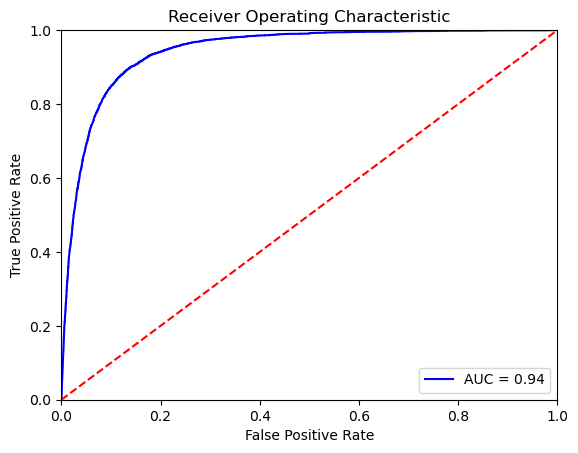

In [49]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred_proba_train)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

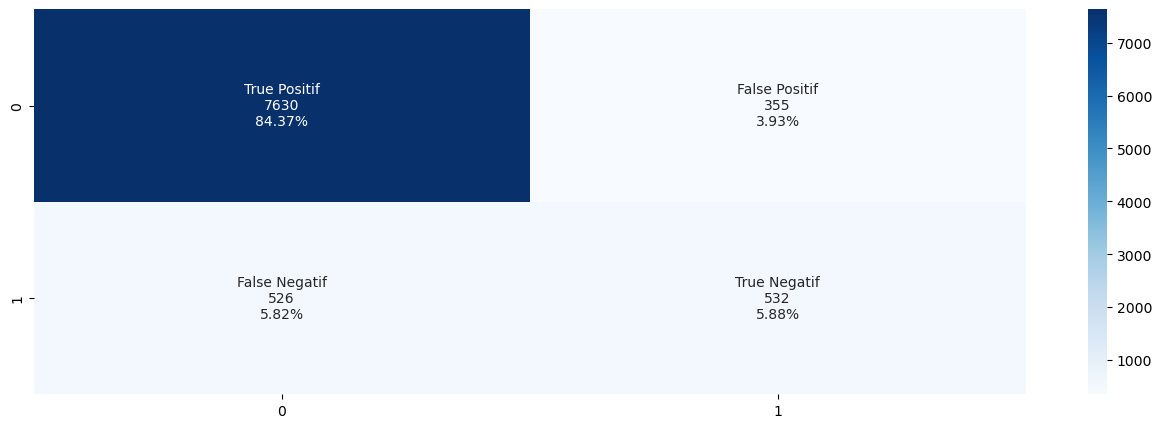

In [50]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_test,y_pred_test) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5)) # size figure
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues'); # make label and colors

# Cross Validation

In [51]:
from sklearn import svm # trigger for cv
from sklearn.model_selection import cross_val_score, StratifiedKFold #choose cv method
skf = StratifiedKFold(n_splits=10)

clf = svm.SVC(kernel='linear', C=1, random_state=42) #triger for check cv
scores = cross_val_score(clf, y_pred_proba_train, y_train, cv=skf) #process cv
print(f' Total of score is {scores}') #mean value
print(f' Mean of score is {scores.mean()}') #mean value

 Total of score is [0.92314072 0.9253525  0.93060547 0.9234172  0.92424661 0.92175836
 0.93309372 0.92507603 0.90293142 0.90376106]
 Mean of score is 0.9213383105468033


# Data Test Model

In [53]:
# sanicheck columns

y_train.shape , y_pred_proba_train.shape, y_test.shape, y_pred_proba_test.shape

((36168,), (36168, 1), (9043,), (9043, 1))

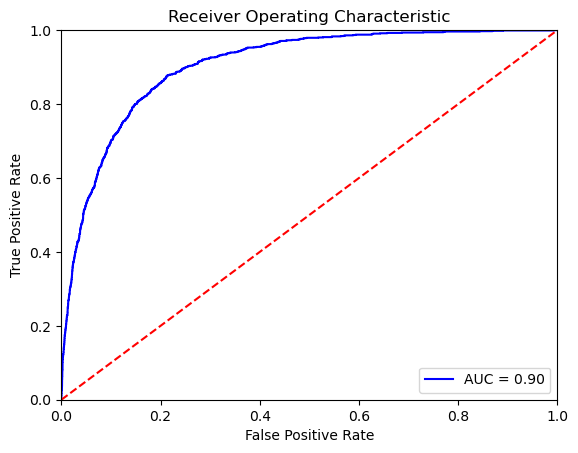

In [54]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_proba_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[7630,  355],
       [ 526,  532]], dtype=int64)

In [56]:
# Tampilkan score
accuracy_score(y_true = y_test,
               y_pred = y_pred_test)

0.9025765785690589

In [57]:
# Tampilkan score
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.94      0.96      0.95      7985
     YES (1)       0.60      0.50      0.55      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043



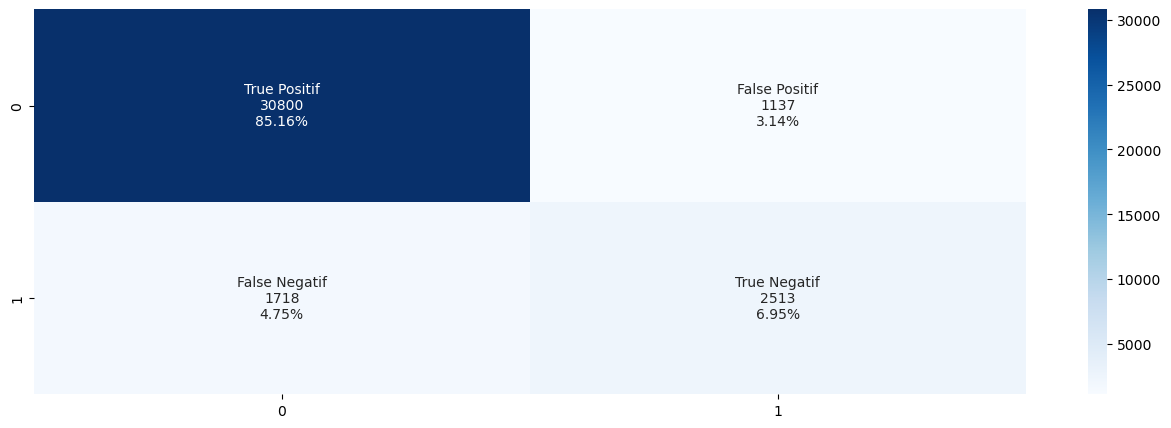

In [58]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_train,y_pred_train) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5)) # size figure
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');  # make label and colors

# Evaluation Model

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score #check Metrics

# Check Metric Positif
# model Random Forest Data Train
print('>>>>>Metrics Data Train<<<<<')
print('Recall: {}'.format(recall_score(y_train, y_pred_train))) # score of recall
print('Precision: {}'.format(precision_score(y_train, y_pred_train))) # score of precision
print('F1-score: {}'.format(f1_score(y_train, y_pred_train))) # score of f1-score
print('Accuracy: {}'.format(accuracy_score(y_train, y_pred_train))) # score of accuracy


# model Random Forest Data Test
print('>>>>>Metrics Data Test<<<<<') 
print('Recall: {}'.format(recall_score(y_test, y_pred_test))) # score of recall
print('Precision: {}'.format(precision_score(y_test, y_pred_test))) # score of precision
print('F1-score: {}'.format(f1_score(y_test, y_pred_test))) # score of f1-score
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_test))) # score of accuracy

>>>>>Metrics Data Train<<<<<
Recall: 0.5939494209406759
Precision: 0.6884931506849316
F1-score: 0.6377363278771729
Accuracy: 0.9210628179606282
>>>>>Metrics Data Test<<<<<
Recall: 0.502835538752363
Precision: 0.5997745208568207
F1-score: 0.5470437017994859
Accuracy: 0.9025765785690589
